# Company Delivery

In [3]:
#İmporting required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
df=pd.read_csv('failure.csv')

EDA - Explorary Data Analysis

bu bir classification ödevi. veride bazı makinelerin belli zamanlarda durum verisi alınmış. Bu verilerle makinenin arıza verip vermeyeceğini tahmin etmeniz isteniyor. hedef sütunu 0 ve 1 den oluşuyor. fakat bir sorun var, veri düzensiz. hedef sütununda bulunan 0 ve 1 lerin sayısı arasında çok fark var. örneğin 0 değeri alan satırlar 100000 adetse 1 değeri alanlar 100 adet(net sayıyı hatırlayamadığım için örnek verdim. siz hedef sütuna value_counts() uygulayarak gerçek değerleri görebilirsiniz.). Bu veriyle model düzgün eğitilemez. 0 ı öğrenir ama 1 i öğrenemez. 
Bu sorunu çözmenin bir yolu smote kullanmak. smote az olan veriyi kendi içinde klonlayarak diğer veriyle aynı sayıya getiriyor. BU sayede bu sorunun önüne geçmiş oluyoruz. Ödevin talimatlarında nasıl kullanılacağının kodu verilmiş. # transform the dataset
from imblearn.over_sampling import SMOTE


In [5]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [6]:
df.shape

(124494, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [8]:
df.corr(numeric_only=True)

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


In [9]:
df.sample(10)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
66078,2015-04-04,W1F0SNW3,0,236018768,0,0,0,11,319242,0,0,0
59095,2015-03-22,W1F0W63P,0,221068160,0,0,6,6,243848,0,0,0
27277,2015-02-04,S1F0RR35,0,134455272,152,0,0,12,280601,0,0,0
17184,2015-01-20,Z1F1AFF2,0,154720632,112,0,0,12,36,0,0,0
26404,2015-02-02,Z1F0QL3N,0,89681088,0,0,0,10,229526,0,0,0
12580,2015-01-14,W1F0SCL1,0,41916000,0,0,0,6,297301,0,0,0
119072,2015-09-14,W1F1CLBY,0,15737488,0,0,0,9,226141,0,0,0
67573,2015-04-07,W1F1BGAB,0,21315472,16,0,0,8,27,0,0,1
27112,2015-02-03,Z1F0QH7R,0,193294624,0,0,0,12,311341,0,0,0
119523,2015-09-17,W1F1CLJG,0,165721696,0,0,0,8,311574,0,0,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
failure,124494.0,8.514467e-04,2.916725e-02,0.0,0.0,0.0,0.0,1.0
attribute1,124494.0,1.223868e+08,7.045960e+07,0.0,61276754.0,122795744.0,183308370.0,244140480.0
attribute2,124494.0,1.594848e+02,2.179658e+03,0.0,0.0,0.0,0.0,64968.0
attribute3,124494.0,9.940455e+00,1.857473e+02,0.0,0.0,0.0,0.0,24929.0
attribute4,124494.0,1.741120e+00,2.290851e+01,0.0,0.0,0.0,0.0,1666.0
attribute5,124494.0,1.422269e+01,1.594302e+01,1.0,8.0,10.0,12.0,98.0
attribute6,124494.0,2.601729e+05,9.915101e+04,8.0,221452.0,249799.5,310266.0,689161.0
attribute7,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
attribute8,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
attribute9,124494.0,1.245152e+01,1.914256e+02,0.0,0.0,0.0,0.0,18701.0


In [11]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

Data Visualization

<Axes: >

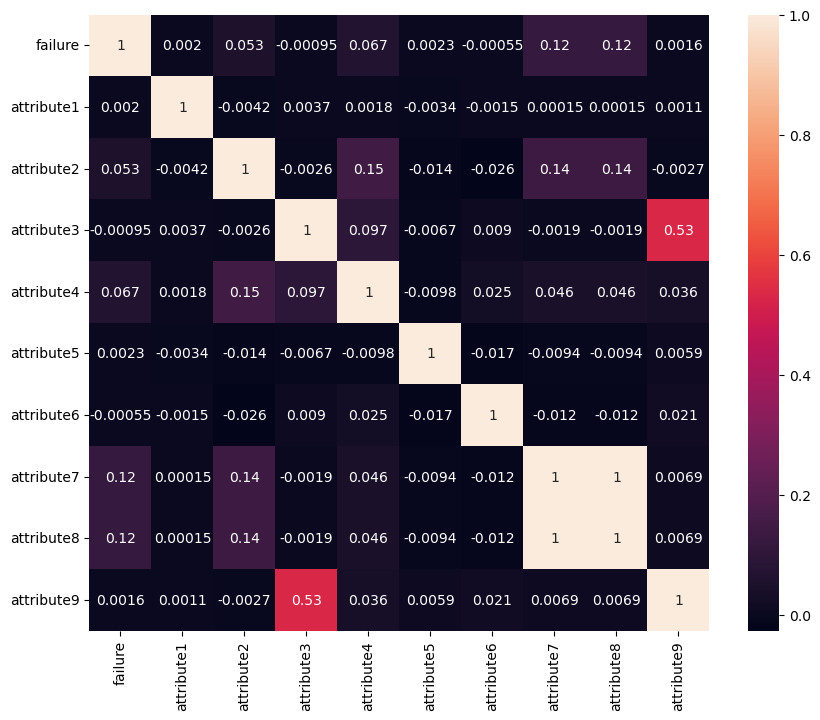

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='failure', ylabel='Count'>

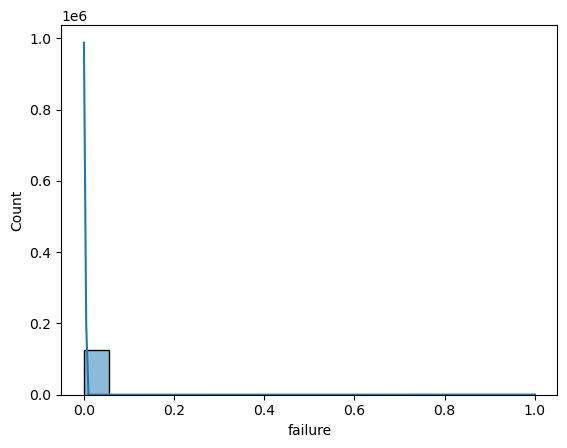

In [13]:
sns.histplot(df['failure'],kde=True)

Feature Engineering

In [14]:
df['date']=pd.to_datetime(df['date'])

In [15]:
df['day']=pd.to_datetime(df['date']).dt.day
df['month']=pd.to_datetime(df['date']).dt.month
df['year']=pd.to_datetime(df['date']).dt.year

In [16]:
df.drop(['device','date'],axis=1,inplace=True)

In [17]:
df['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [18]:
df.sample(10)

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
81840,0,30537608,0,0,0,9,227361,0,0,0,15,5,2015
121916,0,112724664,0,0,0,6,303694,0,0,0,3,10,2015
7891,0,87087320,0,0,0,8,208440,0,0,0,8,1,2015
48346,0,88518328,0,0,0,14,237054,0,0,0,6,3,2015
88205,0,170283800,0,0,0,12,238869,0,0,0,2,6,2015
5294,0,68977272,0,0,0,32,253236,0,0,0,5,1,2015
32318,0,3563328,0,0,0,11,263782,0,0,0,11,2,2015
13668,0,76397208,0,0,0,67,238839,0,0,0,16,1,2015
92242,0,101877728,0,0,0,8,173729,0,0,0,13,6,2015
66305,0,43973664,0,0,0,17,329804,0,0,3,5,4,2015


SMOTE METHOD

In [19]:
x = df.drop(columns=['failure'])
y = df['failure']

In [20]:
x = pd.get_dummies(x, drop_first=True)

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
oversample = SMOTE()
x_resampled, y_resampled = oversample.fit_resample(x, y)

In [23]:
x.sample(10)

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
24956,59059832,0,0,0,16,274121,0,0,0,31,1,2015
77211,65607480,0,0,0,11,227003,0,0,0,3,5,2015
94342,133728984,0,0,0,16,53,0,0,5,19,6,2015
104755,32033184,0,0,0,14,277868,0,0,0,20,7,2015
123371,207769480,0,0,0,6,257055,0,0,0,14,10,2015
63659,230567232,632,0,0,38,327236,8,8,3,30,3,2015
113240,201560464,0,0,0,7,266059,0,0,0,15,8,2015
61953,204493896,0,0,6,10,193628,0,0,0,27,3,2015
106580,42899480,0,0,0,8,247987,0,0,1,25,7,2015
22407,13172520,0,0,0,11,236291,0,0,0,28,1,2015


Modelling

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


def algo_test(x,y):
        gnb=GaussianNB()
        bnb=BernoulliNB()
        lr=LogisticRegression()
        dt=DecisionTreeClassifier()
        rf=RandomForestClassifier()
        gbc=GradientBoostingClassifier()
        knc=KNeighborsClassifier()
        

       
        
        algos=[gnb,bnb,lr,dt,rf,gbc,knc]
        algo_names=['GaussianNB','BernoulliNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        confusion_matrixes= []
        classification_reports= []
        accuracy_scores=[]        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            classification_reports.append(classification_report(p , y_test))
            confusion_matrixes.append(confusion_matrix(p , y_test))
            accuracy_scores.append(accuracy_score(p , y_test))

        for i in range(len(algo_names)):
            print('Algorithm:'+ '\n' , algo_names[i])
            print('Confusion Matrix:'+ '\n' , confusion_matrixes[i])
            print('Classification Report: '+ '\n' , classification_reports[i])
            print('Accuracy Score:'+ '\n' , accuracy_scores[i])
            print('************************************************************')

In [25]:
algo_test(x_resampled,y_resampled)

Algorithm:
 GaussianNB
Confusion Matrix:
 [[24629 20682]
 [  123  4322]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.54      0.70     45311
           1       0.17      0.97      0.29      4445

    accuracy                           0.58     49756
   macro avg       0.58      0.76      0.50     49756
weighted avg       0.92      0.58      0.67     49756

Accuracy Score:
 0.5818594742342632
************************************************************
Algorithm:
 BernoulliNB
Confusion Matrix:
 [[23844  4407]
 [  908 20597]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.84      0.90     28251
           1       0.82      0.96      0.89     21505

    accuracy                           0.89     49756
   macro avg       0.89      0.90      0.89     49756
weighted avg       0.90      0.89      0.89     49756

Accuracy Score:
 0.8931787121151218
****************